In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("loan_data.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(381, 13)

In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [7]:
# Handling Missing Value
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.isnull().mean()*100

Loan_ID              0.000000
Gender               1.312336
Married              0.000000
Dependents           2.099738
Education            0.000000
Self_Employed        5.511811
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.887139
Credit_History       7.874016
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [9]:
df = df.drop('Loan_ID', axis =1)

In [10]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [11]:
df = df.dropna(subset = ['Gender', 'Dependents', 'Loan_Amount_Term'])

In [12]:
df.shape

(358, 12)

In [13]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
df['Self_Employed'].mode()[0]

'No'

In [16]:
df['Credit_History'].unique()

array([ 1., nan,  0.])

In [17]:
df['Credit_History'].mode()[0]

np.float64(1.0)

In [18]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [19]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             358 non-null    object 
 1   Married            358 non-null    object 
 2   Dependents         358 non-null    object 
 3   Education          358 non-null    object 
 4   Self_Employed      358 non-null    object 
 5   ApplicantIncome    358 non-null    int64  
 6   CoapplicantIncome  358 non-null    float64
 7   LoanAmount         358 non-null    float64
 8   Loan_Amount_Term   358 non-null    float64
 9   Credit_History     358 non-null    float64
 10  Property_Area      358 non-null    object 
 11  Loan_Status        358 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 36.4+ KB


In [21]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [22]:
df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [23]:
df['Dependents'] = df['Dependents'].replace('3+', '4')

In [24]:
df['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [25]:
df['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             358 non-null    object 
 1   Married            358 non-null    object 
 2   Dependents         358 non-null    object 
 3   Education          358 non-null    object 
 4   Self_Employed      358 non-null    object 
 5   ApplicantIncome    358 non-null    int64  
 6   CoapplicantIncome  358 non-null    float64
 7   LoanAmount         358 non-null    float64
 8   Loan_Amount_Term   358 non-null    float64
 9   Credit_History     358 non-null    float64
 10  Property_Area      358 non-null    object 
 11  Loan_Status        358 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 36.4+ KB


In [27]:
encoding = {
    'Gender': {'Male':1 , 'Female': 0}, 
    'Married': {'Yes': 1, 'No': 0},
    'Dependents': {'0':0, '1':1, '2': 2, '4': 4},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Property_Area': {'Rural': 0, 'Semiurban': 2, 'Urban': 1},
    'Loan_Status': {'Y': 1, 'N': 0}
}

In [28]:
df.replace(encoding, inplace=True)
df.infer_objects(copy=False)

C:\Users\Excel\AppData\Local\Temp\ipykernel_25272\3895898670.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(encoding, inplace=True)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
2,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
3,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
4,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,4,1,0,5703,0.0,128.0,360.0,1.0,1,1
377,1,1,0,1,0,3232,1950.0,108.0,360.0,1.0,0,1
378,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
379,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             358 non-null    int64  
 1   Married            358 non-null    int64  
 2   Dependents         358 non-null    int64  
 3   Education          358 non-null    int64  
 4   Self_Employed      358 non-null    int64  
 5   ApplicantIncome    358 non-null    int64  
 6   CoapplicantIncome  358 non-null    float64
 7   LoanAmount         358 non-null    float64
 8   Loan_Amount_Term   358 non-null    float64
 9   Credit_History     358 non-null    float64
 10  Property_Area      358 non-null    int64  
 11  Loan_Status        358 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 36.4 KB


In [30]:
X = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [31]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
2,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
3,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
4,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,1,1


In [32]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [33]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,1,0,0.711630,0.092069,0.805980,0.285826,1.0,0
1,1,1,0,1,1,-0.398856,-0.539332,-1.350425,0.285826,1.0,1
2,1,1,0,0,0,-0.691384,0.447965,0.527735,0.285826,1.0,1
3,1,0,0,1,0,1.705666,-0.539332,1.258130,0.285826,1.0,1
4,1,1,0,0,0,-0.866761,0.095418,-0.341784,0.285826,1.0,1


In [34]:
def evaluate_model(model):
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cross_val = cross_val_score(model, X, y, cv=5)
    avg_cross_val = np.mean(cross_val)
    print(f"{model.__class__.__name__} - Accuarcy : {accuracy: .2f} , Cross-Val-Score: {avg_cross_val: .2f}")
    return avg_cross_val

In [35]:
models = {
    LogisticRegression(),
    svm.SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(), 
}

In [36]:
model_score = {model.__class__.__name__:evaluate_model(model) for model in models}

LogisticRegression - Accuarcy :  0.85 , Cross-Val-Score:  0.84
GradientBoostingClassifier - Accuarcy :  0.86 , Cross-Val-Score:  0.82
RandomForestClassifier - Accuarcy :  0.85 , Cross-Val-Score:  0.82
SVC - Accuarcy :  0.85 , Cross-Val-Score:  0.83
DecisionTreeClassifier - Accuarcy :  0.85 , Cross-Val-Score:  0.77


In [37]:
def tune_model(model, param_grid):
    tuner = RandomizedSearchCV(model, param_grid, cv = 5, n_iter =20, verbose = True, random_state = 42)
    tuner.fit(X, y)
    print(f"Best Score for {model.__class__.__name__}: {tuner.best_score_:.2f}")
    print(f"Best Parameter for {model.__class__.__name__}: {tuner.best_params_}")
    return tuner.best_estimator_

In [38]:
log_reg_grid = {'C': np.logspace(-4, 4, 20), "solver": ["liblinear"]}
svc_grid = {'C': [0.25, 0.50, 0.75, 1], "kernel": ['linear']}

rf_grid = {
    'n_estimators': np.arange(10, 1000, 10),
    'max_features': ['log2', 'sqrt'], 
    'max_depth': [None, 3, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 20, 50, 100],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [39]:
best_log_reg = tune_model(LogisticRegression(), log_reg_grid)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Score for LogisticRegression: 0.84
Best Parameter for LogisticRegression: {'solver': 'liblinear', 'C': np.float64(1.623776739188721)}


In [40]:
best_svc_reg = tune_model(svm.SVC(), svc_grid)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Score for SVC: 0.84
Best Parameter for SVC: {'kernel': 'linear', 'C': 0.25}


C:\Users\Excel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [41]:
best_rf = tune_model(RandomForestClassifier(), rf_grid)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Score for RandomForestClassifier: 0.84
Best Parameter for RandomForestClassifier: {'n_estimators': np.int64(550), 'min_samples_split': 100, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 10}


In [42]:
final_model = best_rf

In [43]:
joblib.dump(final_model, 'loan_status_predictor.pkl')

['loan_status_predictor.pkl']

In [44]:
# Prediction System

sample_data = pd.DataFrame({
    'Gender': [1],
    'Married': [1],
    'Dependents': [2],
    'Education': [0],
    'Self_Employed': [0],
    'ApplicantIncome': [1000],
    'CoapplicantIncome': [0.0],
    'LoanAmount': [150],
    'Loan_Amount_Term': [180],
    'Credit_History': [0],
    'Property_Area': [1]
})

sample_data[num_cols] = scaler.transform(sample_data[num_cols])
loaded_model = joblib.load('loan_status_predictor.pkl')
prediction = loaded_model.predict(sample_data)

result = "Loan Approved" if prediction[0] == 1 else "Loan Not Approved"
print(f"\nPrediction Result: {result}")


Prediction Result: Loan Not Approved


In [45]:
joblib.dump(scaler, 'vector.pkl')

['vector.pkl']

# Graphs to analyse the loan approval 

## Univariate Analysis of Categorical Features

### Distribution of Gender

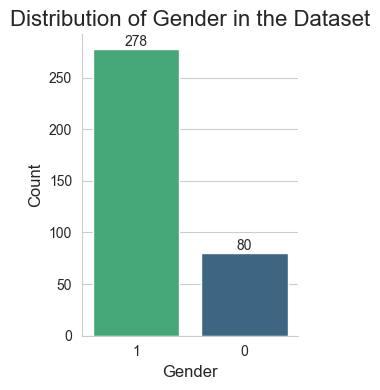

In [46]:
sns.set_style("whitegrid")

plt.figure(figsize=(3, 4))
ax = sns.countplot(hue='Gender', x='Gender', data=df, palette='viridis', order=df['Gender'].value_counts().index, legend=False)

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Distribution of Gender in the Dataset', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### Married Status

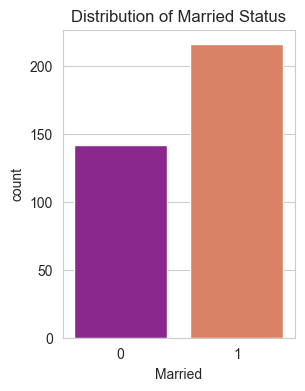

In [47]:
plt.figure(figsize=(3, 4))
sns.countplot(x='Married', hue='Married', data=df, palette='plasma', legend=False)
plt.title('Distribution of Married Status')
plt.show()

### Education Level

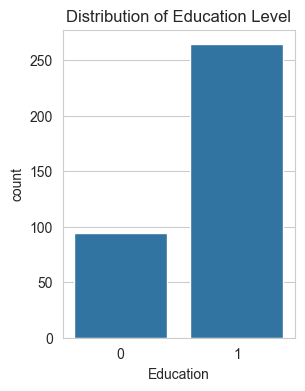

In [48]:
plt.figure(figsize=(3, 4))
sns.countplot(x='Education', data=df)
plt.title('Distribution of Education Level')
plt.show()

### Self-Employed Status

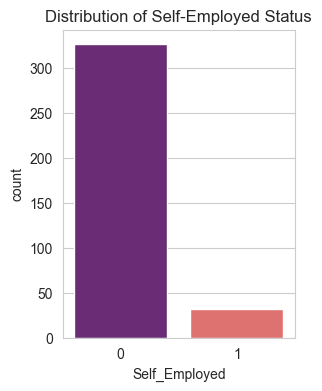

In [49]:
plt.figure(figsize=(3, 4))
sns.countplot(x='Self_Employed', hue='Self_Employed', data=df, palette='magma', legend=False)
plt.title('Distribution of Self-Employed Status')
plt.show()

## Univariate Analysis of the Target Variable

### Loan Status Distribution

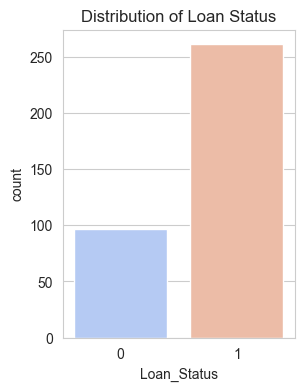

In [50]:
plt.figure(figsize=(3, 4))
sns.countplot(x='Loan_Status', hue='Loan_Status', data=df, palette='coolwarm', legend=False)
plt.title('Distribution of Loan Status')
plt.show()

## Bivariate Analysis: Categorical Features vs. Loan Status

### Loan Status by Gender

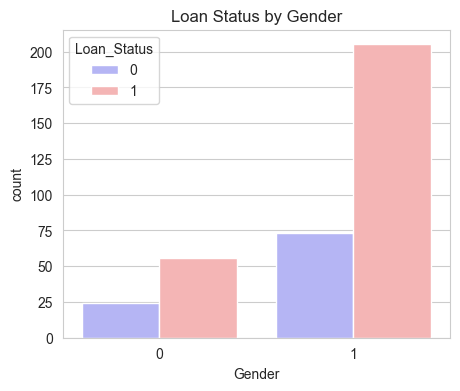

In [51]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Gender', hue='Loan_Status', data=df, palette='bwr')
plt.title('Loan Status by Gender')
plt.show()

## Loan Status by Married Status


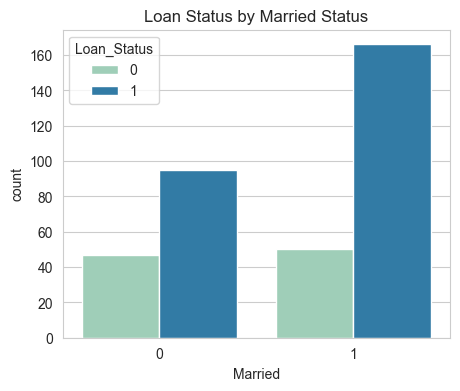

In [52]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Married', hue='Loan_Status', data=df, palette='YlGnBu')
plt.title('Loan Status by Married Status')
plt.show()

### Loan Status by Self-Employed

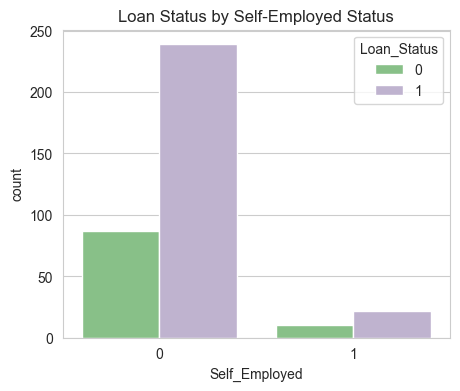

In [53]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df, palette='Accent')
plt.title('Loan Status by Self-Employed Status')
plt.show()

## Univariate Analysis of Numerical Features

### Applicant Income Distribution

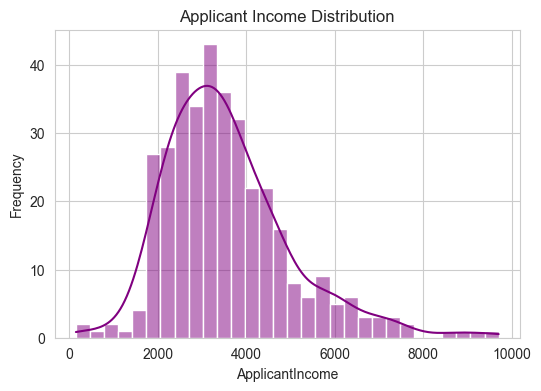

In [54]:
plt.figure(figsize=(6, 4))
sns.histplot(df['ApplicantIncome'], bins=30, kde=True, color='purple')
plt.title('Applicant Income Distribution')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.show()

### Loan Amount Distribution

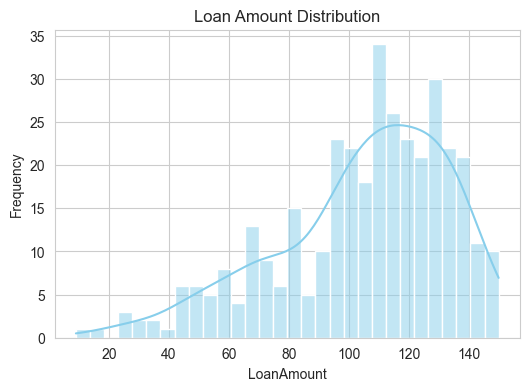

In [55]:
plt.figure(figsize=(6, 4))
sns.histplot(df['LoanAmount'], bins=30, kde=True, color='skyblue')
plt.title('Loan Amount Distribution')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.show()

## Bivariate Analysis: Numerical Features

### Loan Amount vs. Applicant Income

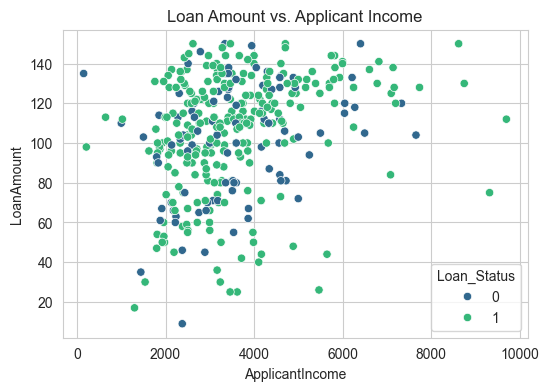

In [56]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df, palette='viridis')
plt.title('Loan Amount vs. Applicant Income')
plt.show()